In [4]:
#Load 131k seq data 

from Bio import SeqIO
import pandas as pd

eyed = []
desc = []
seqs = []

for seq_record in SeqIO.parse('Complete NCBI Virus Genbank only.fasta', "fasta"):
    eyed.append(seq_record.id)
    desc.append(seq_record.description)

#All following anomalies in this cell had species name missing
#Fix anomaly at index 21244

desc[21244] = 'MK293717 |Gemycircularvirus strain RN/Haikou/China| complete genome|complete|China|Rattus norvegicus|Gemycircularvirus'.lower()

#Fix anomaly at index 40853

desc[40853] = 'mf407276 |bacillus phage vb_bvep-goe6| complete genome|complete||bacillus velezensis fzb42|bacillus phage'

#Fix anomaly at index 50896

desc[50896] = 'kx349291 |cyanophage s-rim44 isolate es_42_0910| complete genome|complete|usa|synechococcus|cyanophage'

#Fix other cyanophage anomalies

c = 0
l = []
for i in desc:
    if i[-1] == '|':
        l.append(c)
    c+=1
    
for i in l:
    desc[i] = desc[i] + 'cyanophage' 

In [5]:
#load sequence id and description into dataframe

df = pd.DataFrame({'Sequence description' : desc})
df['ID'] = eyed

#Get species name by taking last '|' split section from description

l = [x.split('|')[-1].lower() for x in df['Sequence description']]
df['Species'] = l

#New dataframe with only unique species names

df2 = df.drop_duplicates(subset = 'Species')

#leaves 17046 rows

In [11]:
l = list(df2.index)
c = 0
for sr in SeqIO.parse('Complete NCBI Virus Genbank only.fasta', "fasta"):
    if c in l:
        seqs.append(sr.seq)
    c+=1
print(len(seqs))    

17047


In [17]:
df2['Seqs'] = seqs

<ipython-input-17-b89cf912e125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Seqs'] = seqs


In [25]:
df2['Len'] = [len(i) for i in seqs]

<ipython-input-25-274fcea48266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Len'] = [len(i) for i in seqs]


In [27]:
df2.to_csv('17k des, id, sp, seq and len.csv', index = False)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

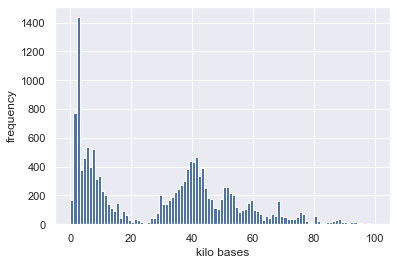

In [74]:
f = plt.hist(df2['Len']/1000, bins = 100, range = (0,100))
f = plt.xlabel('kilo bases')
f = plt.ylabel('frequency')
plt.savefig('17k hist.png', format = 'png')

In [72]:
plt.savefig('17k hist.png', format = 'png')

<Figure size 432x288 with 0 Axes>

In [120]:
pd.options.display.max_rows = 50

In [123]:
dft = df2.loc[df2['Len'].between(15000,25000)]

In [124]:
dft['Species'].to_list()

['porcine reproductive and respiratory syndrome virus',
 'alphamesonivirus 1',
 'arthrobacter phage bluefeather',
 'arthrobacter phage whytu',
 'thermoproteus spherical piliferous virus 1',
 'capsaspora meld virus 1',
 'swordtail adomavirus 2',
 'coelastrella green algae meld virus',
 'carp adomavirus',
 'leatherback sea turtle adomavirus',
 'bos-associated insect adintovirus 2',
 'ladona dragonfly adintovirus',
 'swordtail adomavirus 1',
 'grenadier adomavirus',
 'strongylocentrotus sea urchin adintovirus',
 'barramundi adomavirus',
 'anelosimus tangle-web spider meld virus',
 'stylophora coral adintovirus',
 'porcine respirovirus 1',
 'trichoplax meld virus',
 'monosiga meld virus 2',
 'blastocystis meld virus',
 'hydra adintovirus',
 'monoraphidium meld virus',
 'hydra meld virus',
 'zaire ebolavirus',
 'human orthopneumovirus',
 'avian avulavirus 1',
 'feline morbillivirus',
 'bifidobacterium phage badaztec1',
 'bifidobacterium phage badaztec4',
 'bifidobacterium phage badaztec2',
